In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
# 日本語のストップワードを追加（必要に応じてカスタマイズ）
stop_words = set(stopwords.words('english'))  # ここに日本語のストップワードを追加


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haruto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haruto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df = pd.read_csv("car_reviews_full.csv")
df.head()

,Title,Date,Author,Rating,Model,Grade,Usage,Summary,総評,満足している点,不満な点,デザイン,走行性能,乗り心地,積載性,燃費,価格,故障経験
0,運転が楽しい,投稿日： 2024年7月20日,投稿者： ほほほほほほ さん,5,メーカー・モデル: スバル レヴォーグ,グレード：STI スポーツ EX_AWD(CVT_1.8)\n ...,乗車形式: マイカー,走行性、乗り心地は非常に素晴らしく、機能も充実しており、安全性も高いとなると、非常にコスパが...,走行性、乗り心地は非常に素晴らしく、機能も充実しており、安全性も高いとなると、非常にコスパが...,乗り心地、操縦性、デザインは非常に満足。積載に関して、普段荷物はあまり積まないけど何回か満タ...,不具合が大杉。納車から1年半時点で、エンジンから異音、ショックアブソーバーから異音、オイル漏...,5,5,4,4,2,2,NaN
1,妻の通勤車およびワンコたちのお出かけカー,投稿日： 2024年7月19日,投稿者： かなぴー（♂） さん,3,メーカー・モデル: スバル インプレッサスポーツワゴン,グレード：1.5i スペシャル_4WD(MT_1.5)\n ...,乗車形式: マイカー,まぁいい買い物だったと思う。これから走ってどんなトラブルがあるか(オイル滲みはよくあるらしい...,まぁいい買い物だったと思う。これから走ってどんなトラブルがあるか(オイル滲みはよくあるらしい...,広い室内と乗り心地の良いノーマルの足。いかにもっていう水平対向エンジン音。,ロードノイズが大きくエンジン音が聞こえない。燃費は四駆だから悪いとは思ってたけど田舎のワイン...,3,3,5,5,1,3,実走200kmなんでもう壊れてたら困るｗ
2,扱い易いサイズと最高の乗り心地,投稿日： 2024年7月19日,投稿者： のな氏 さん,5,メーカー・モデル: スバル レヴォーグ,グレード：STI スポーツ EX ブラックインテリアセレクション_AWD(CVT_1.8)\...,乗車形式: マイカー,STIグレードなので電子制御サスペンションで足回りの硬さなどがセッティングできるので、1台3...,STIグレードなので電子制御サスペンションで足回りの硬さなどがセッティングできるので、1台3...,視界も広く安全装備も満載。日本の道路サイズにもマッチしており、運転しやすいサイズも良い。なに...,燃費だけは仕方ないと思ってます笑,5,5,5,5,2,4,NaN
3,早いものでもう10年,投稿日： 2024年7月19日,投稿者： 群青(WRX-S4) さん,5,メーカー・モデル: スバル WRX S4,グレード：2.0GT-S アイサイト_AWD(CVT_2.0)\n ...,乗車形式: マイカー,街乗りも高速も走りに不満なし。買って本当に良かった。これからも乗り続ける予定です。,街乗りも高速も走りに不満なし。買って本当に良かった。これからも乗り続ける予定です。,10年経過を感じさせない造りと性能。2000ccのターボで4駆、馬力は300ps、そんな車は...,買った当初、ナンバー灯とフォグランプが電球で暗かった。今時の車にしてはLEDじゃなかった。室...,5,5,5,4,3,4,エアコンのコンプレッサー、CVTとエンジンからのオイル漏れ大きいのはこの２つ。
4,文化遺産,投稿日： 2024年7月19日,投稿者： REIAI さん,5,メーカー・モデル: スバル サンバー,グレード：-,乗車形式: マイカー,レーシーな運転をしてもスピードメーターをみると時速50キロw燃費は13位北海道なのでとにかく...,レーシーな運転をしてもスピードメーターをみると時速50キロw燃費は13位北海道なのでとにかく...,今の車にない作り足元の広さ小回りリアエンジンの走りデザイン大好きです。,不満と言うより不安が多いですかね。北海道で本州の車屋さんから購入したので主治医が見つかってい...,5,4,3,5,3,3,まだない


C:\Users\haruto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\haruto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\haruto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\haruto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21336 (\N{CJK UNIFIED IDEOGRAPH-5358}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\haruto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io,

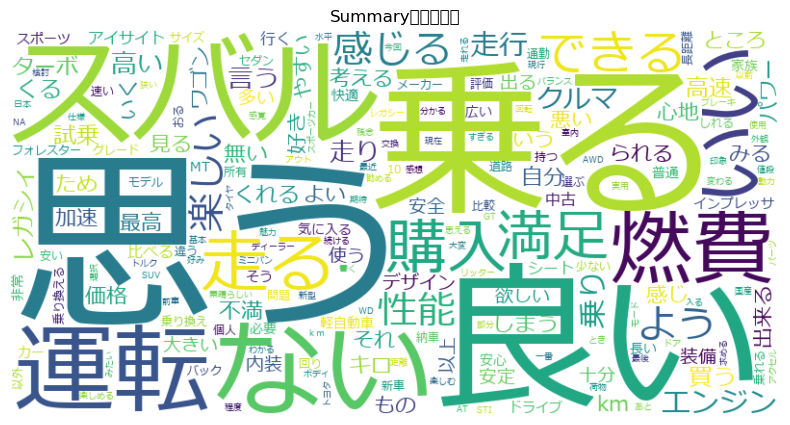

In [38]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from janome.tokenizer import Tokenizer
from collections import Counter

# CSVファイルの読み込み
df = pd.read_csv('car_reviews_full.csv')

# Janomeの設定
tokenizer = Tokenizer()

# テキストデータの結合
all_text = " ".join(df['Summary'].dropna().tolist())

# 形態素解析
tokens = tokenizer.tokenize(all_text)
words = [token.base_form for token in tokens if token.part_of_speech.split(',')[0] in ['名詞', '形容詞', '動詞']]

# ストップワードの除去
stop_words = set(['てる', 'いる', 'なる', 'れる', 'する', 'ある', 'こと', 'これ', 'さん', 'する', 'せる', 'した'])
filtered_words = [word for word in words if word not in stop_words and len(word) > 1]

# 頻出単語のカウント
word_freq = Counter(filtered_words)

# ワードクラウドの作成
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:\Windows\Fonts\meiryo.ttc').generate_from_frequencies(word_freq)

# ワードクラウドの表示
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Summaryの頻出単語')
plt.show()


In [ ]:

t = Tokenizer()
def extract_nouns(text, tokenizer):
    words = [token.surface for token in tokenizer.tokenize(text) if token.part_of_speech.startswith('形容詞')]
    return ' '.join(words)

# 各行に形態素解析を適用し、名詞のみを抽出
df['形容詞のみ'] = df['Summary'].apply(lambda x: extract_nouns(x, t))

In [35]:
pip install MeCab

     ---------------------------------------- 0.0/62.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/62.6 kB ? eta -:--:--
     ------------ ------------------------- 20.5/62.6 kB 217.9 kB/s eta 0:00:01
     ------------------------ ------------- 41.0/62.6 kB 279.3 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/62.6 kB 290.5 kB/s eta 0:00:01
     -------------------------------------- 62.6/62.6 kB 257.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for MeCab
Failed to build MeCab
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [9 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  copying MeCab.py -> build\lib.win-amd64-cpython-311
  running build_ext
  building '_MeCab' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for MeCab
ERROR: Could not build wheels for MeCab, which is required to install pyproject.toml-based projects


In [ ]:
install pyproject.toml-based p



In [ ]:
 Janomeを用いた形態素解析関数
t = Tokenizer()
def extract_nouns(text, tokenizer):
    words = [token.surface for token in tokenizer.tokenize(text) if token.part_of_speech.startswith('形容詞')]
    return ' '.join(words)

# 各行に形態素解析を適用し、名詞のみを抽出
df['形容詞のみ'] = df['Summary'].apply(lambda x: extract_nouns(x, t))

In [28]:
from janome.tokenizer import Tokenizer

# Janomeを用いた形態素解析関数
t = Tokenizer()
def extract_nouns(text, tokenizer):
    words = [token.surface for token in tokenizer.tokenize(text) if token.part_of_speech.startswith('形容詞')]
    return ' '.join(words)

# 各行に形態素解析を適用し、名詞のみを抽出
df['形容詞のみ'] = df['Summary'].apply(lambda x: extract_nouns(x, t))


In [29]:
vectorizer = TfidfVectorizer(stop_words=['こと', 'ため', 'よう', 'もの', 'これ', 'それ', 'どこ', 'そこ', 'たい', 'ほか', 'さっき', 'びと'])
X = vectorizer.fit_transform(df['形容詞のみ'])

# ベクトル化されたデータをDataFrameに変換
df_vectorized = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# TOP30のキーワードを特定
top_30_keywords = df_vectorized.sum().nlargest(30)
print("TOP30のキーワード:")
print(top_30_keywords)

TOP30のキーワード:
良い       1702.151785
いい       1445.713970
楽しい       959.579284
ない        959.209123
高い        707.360884
良く        689.703411
無い        495.862208
なく        456.505131
良かっ       427.406195
やすい       419.083835
長く        398.239515
欲しい       373.562039
悪い        367.439107
楽しく       366.558242
楽し        338.786192
素晴らしい     331.205348
多い        330.418293
なし        275.148934
悪く        266.188262
高く        250.584167
よかっ       240.074071
少ない       226.253858
大きく       214.511179
よい        202.857967
速い        202.732546
無く        202.057013
安い        183.116915
よく        171.616320
ほしい       170.403787
やすく       168.944199
dtype: float64


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDFを用いてベクトル化し、キーワードを抽出
vectorizer = TfidfVectorizer(stop_words=['こと', 'ため', 'よう', 'もの', 'これ', 'それ', 'どこ', 'そこ', 'たい', 'ほか', 'さっき', 'びと'])
X = vectorizer.fit_transform(df['名詞のみ'])

# ベクトル化されたデータをDataFrameに変換
df_vectorized = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# TOP30のキーワードを特定
top_30_keywords = df_vectorized.sum().nlargest(30)
print("TOP30のキーワード:")
print(top_30_keywords)


TOP30のキーワード:
満足       640.526716
運転       544.199972
スバル      497.187551
燃費       480.175757
クルマ      392.531367
性能       360.918812
乗り       360.620999
購入       358.877103
最高       342.809826
不満       337.040333
走行       331.318797
走り       324.136710
エンジン     292.986507
自分       263.916913
好き       259.323374
レガシィ     245.357174
高速       229.513299
パワー      222.883128
ターボ      217.103120
ところ      212.905346
試乗       204.051712
安全       201.558029
感じ       192.521086
価格       190.926236
心地       189.258549
デザイン     186.744393
十分       185.968678
加速       185.056230
アイサイト    182.072981
キロ       181.314052
dtype: float64


In [25]:
pip install janome

   ---------------------------------------- 0.0/19.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.7 MB 435.7 kB/s eta 0:00:46
   ---------------------------------------- 0.0/19.7 MB 326.8 kB/s eta 0:01:01
   ---------------------------------------- 0.1/19.7 MB 297.7 kB/s eta 0:01:06
   ---------------------------------------- 0.1/19.7 MB 297.7 kB/s eta 0:01:06
   ---------------------------------------- 0.1/19.7 MB 385.0 kB/s eta 0:00:51
   ---------------------------------------- 0.1/19.7 MB 359.9 kB/s eta 0:00:55
   ---------------------------------------- 0.2/19.7 MB 455.1 kB/s eta 0:00:43
   ---------------------------------------- 0.2/19.7 MB 497.6 kB/s eta 0:00:40
    --------------

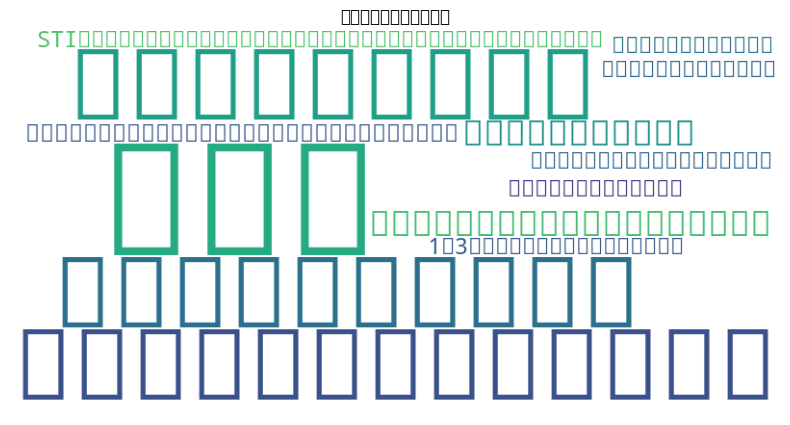

In [23]:
partial_text = " ".join(texts[0:3])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(partial_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('レビュー内容の頻出単語')
plt.show()

C:\Users\haruto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\haruto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12499 (\N{KATAKANA LETTER BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\haruto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12517 (\N{KATAKANA LETTER SMALL YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\haruto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\haruto\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20869 (\N{CJK UNIFIED IDEOGRAPH-5185}) missing from current font.
  fig.canvas.print_figure(bytes_i

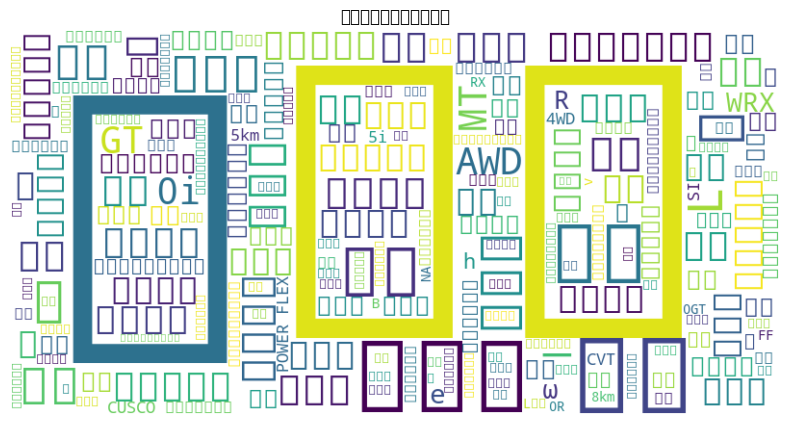

In [10]:
all_text = " ".join(texts)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('レビュー内容の頻出単語')
plt.show()

In [33]:
texts = df['Summary'].tolist()

vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=['こと', 'ため', 'よう', 'もの', 'これ', 'それ', 'どこ', 'そこ', 'たい', 'ほか', 'さっき', 'びと'])
X = vectorizer.fit_transform(texts)

# KMeansクラスタリング
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X)

# クラスタリング結果をデータフレームに追加
df['クラスタ'] = clusters

# 各クラスタの代表ワードを抽出
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    terms = vectorizer.get_feature_names_out()
    for i, r in df.iterrows():
        print(f'\nクラスタ {i} の代表ワード:')
        print(', '.join([terms[t] for t in np.argsort(r)[-n_terms:]]))

# 代表ワードを抽出
get_top_keywords(X, clusters, df['クラスタ'], 5)

C:\Users\haruto\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\haruto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



クラスタ 0 の代表ワード:


NameError: name 'np' is not defined